In [ ]:
#installing library
!pip install yfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

In [ ]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2023)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(start=start, end=end)


df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-23 00:00:00-05:00,5940.250000,5978.250000,5902.569824,5974.069824,3593280000,0.0,0.0
2024-12-24 00:00:00-05:00,5984.629883,6040.100098,5981.439941,6040.040039,1757720000,0.0,0.0
2024-12-26 00:00:00-05:00,6024.970215,6049.750000,6007.370117,6037.589844,2904530000,0.0,0.0
2024-12-27 00:00:00-05:00,6006.169922,6006.169922,5932.950195,5970.839844,3159610000,0.0,0.0
2024-12-30 00:00:00-05:00,5920.669922,5940.790039,5869.160156,5906.939941,3433250000,0.0,0.0


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,0.0,0.0
2024-01-04 00:00:00-05:00,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,0.0,0.0
2024-01-05 00:00:00-05:00,4690.569824,4721.490234,4682.109863,4697.240234,3844370000,0.0,0.0
2024-01-08 00:00:00-05:00,4703.700195,4764.540039,4699.819824,4763.540039,3742320000,0.0,0.0


In [ ]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [ ]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2024-12-31',
 '2025-01-02',
 '2025-01-03',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-09',
 '2025-01-10',
 '2025-01-13',
 '2025-01-14',
 '2025-01-15',
 '2025-01-16',
 '2025-01-17',
 '2025-01-21',
 '2025-01-22',
 '2025-01-23',
 '2025-01-24',
 '2025-01-27',
 '2025-01-28',
 '2025-01-29',
 '2025-01-30',
 '2025-01-31',
 '2025-02-03',
 '2025-02-04',
 '2025-02-05',
 '2025-02-07',
 '2025-02-10',
 '2025-02-14',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-10-17',
 '2025-11-21',
 '2025-12-19',
 '2025-12-31',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250102C02400000,2024-12-30 21:05:43+00:00,2400.0,3502.93,3522.2,3537.9,0.0,0.0,3.0,1,5.393924,True,REGULAR,USD
1,SPXW250102C02600000,2024-12-30 14:35:10+00:00,2600.0,3294.95,3322.2,3338.3,0.0,0.0,1.0,2,4.965336,True,REGULAR,USD
2,SPXW250102C02800000,2024-12-30 21:08:04+00:00,2800.0,3099.73,3121.7,3138.3,0.0,0.0,2.0,3,4.552311,True,REGULAR,USD
3,SPXW250102C04000000,2024-12-23 14:31:14+00:00,4000.0,1948.53,1922.9,1938.5,0.0,0.0,NaN,9,2.610050,True,REGULAR,USD
4,SPXW250102C04400000,2024-12-30 16:50:28+00:00,4400.0,1509.38,1522.9,1538.5,0.0,0.0,1.0,1,2.068914,True,REGULAR,USD


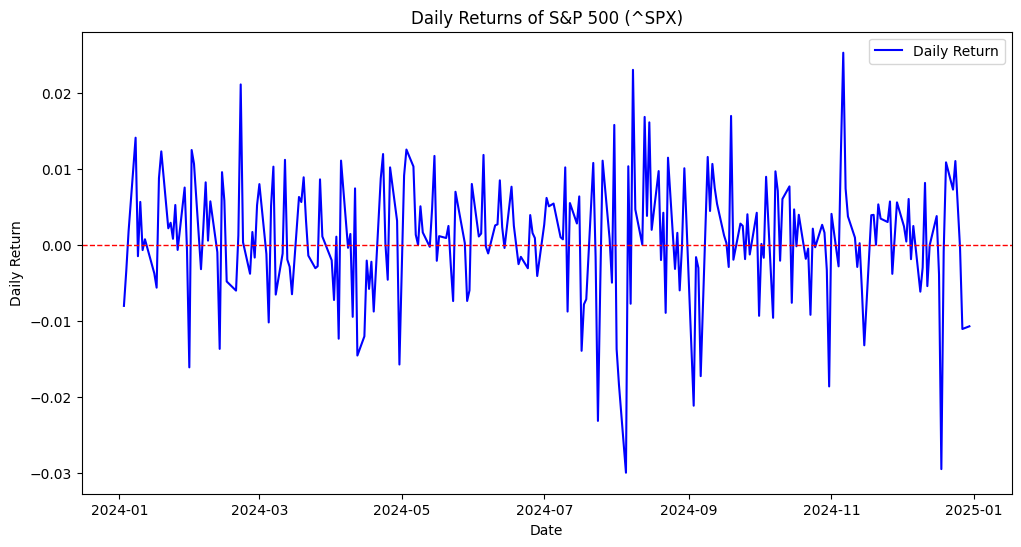

In [ ]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Drop the first row with NaN due to the percentage change calculation
df.dropna(inplace=True)

# Visualize daily returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily Return'], label='Daily Return', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Daily Returns of S&P 500 (^SPX)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

* **Volatility:** The fluctuations in the daily return values suggest that the S&P 500 experienced periods of both high and low volatility. Larger spikes or drops represent significant daily price changes.

* **Mean-Reversion Tendency:** The red dashed line represents the zero return (or no change). The returns oscillating around this line indicate a mean-reversion tendency, which is typical in stock markets.

* **Outliers and Shocks:** Some points deviate significantly from the zero line, which could indicate market events or shocks, such as economic announcements, geopolitical events, or earnings surprises.


Volatility (Standard Deviation): 0.00798
Average Daily Return: 0.00091
Number of Extreme Positive Returns (>2*Volatility): 6
Number of Extreme Negative Returns (<-2*Volatility): 8


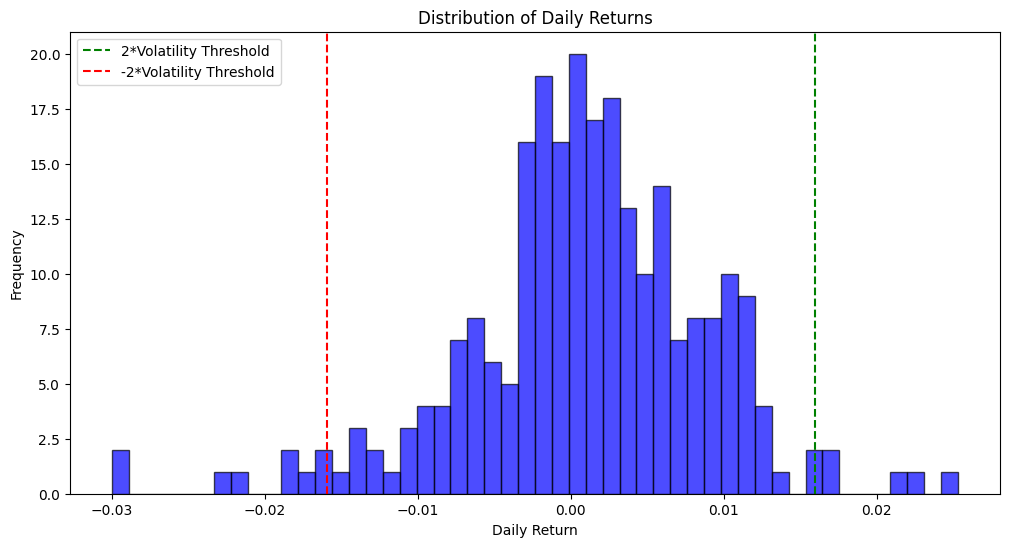

In [ ]:
# Metrics calculations
volatility = df['Daily Return'].std()  # Standard deviation as a measure of volatility
average_return = df['Daily Return'].mean()  # Average daily return
extreme_positive = (df['Daily Return'] > 2 * volatility).sum()  # Extreme positive returns
extreme_negative = (df['Daily Return'] < -2 * volatility).sum()  # Extreme negative returns

# Print metrics
print(f"Volatility (Standard Deviation): {volatility:.5f}")
print(f"Average Daily Return: {average_return:.5f}")
print(f"Number of Extreme Positive Returns (>2*Volatility): {extreme_positive}")
print(f"Number of Extreme Negative Returns (<-2*Volatility): {extreme_negative}")

# Distribution visualization
plt.figure(figsize=(12, 6))
plt.hist(df['Daily Return'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(x=2 * volatility, color='green', linestyle='--', label='2*Volatility Threshold')
plt.axvline(x=-2 * volatility, color='red', linestyle='--', label='-2*Volatility Threshold')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Volatility (Standard Deviation = 0.00798):**
* The daily returns fluctuate with a standard deviation of 0.00798 (0.8%).
* This means that, on average, the daily returns can vary by this amount, indicating a moderate level of risk.

**Average Daily Return (0.00091):**
* On average, the daily return is 0.09% (close to zero), which suggests a very small daily growth or decline.
* This indicates that over the short term, the market does not show extreme growth, but small incremental changes.

**Extreme Positive Returns (6 occurrences):**
* There were 6 days when the return was greater than 2×Volatility (around 1.6% gain or higher).
* This is relatively rare, which suggests that extreme positive movements are not very frequent.

**Extreme Negative Returns (8 occurrences):**
* There were 8 days when the return was less than -2×Volatility (around 1.6% loss or more).
* This indicates a slightly higher frequency of large negative returns, which may point to more risk in the downside.

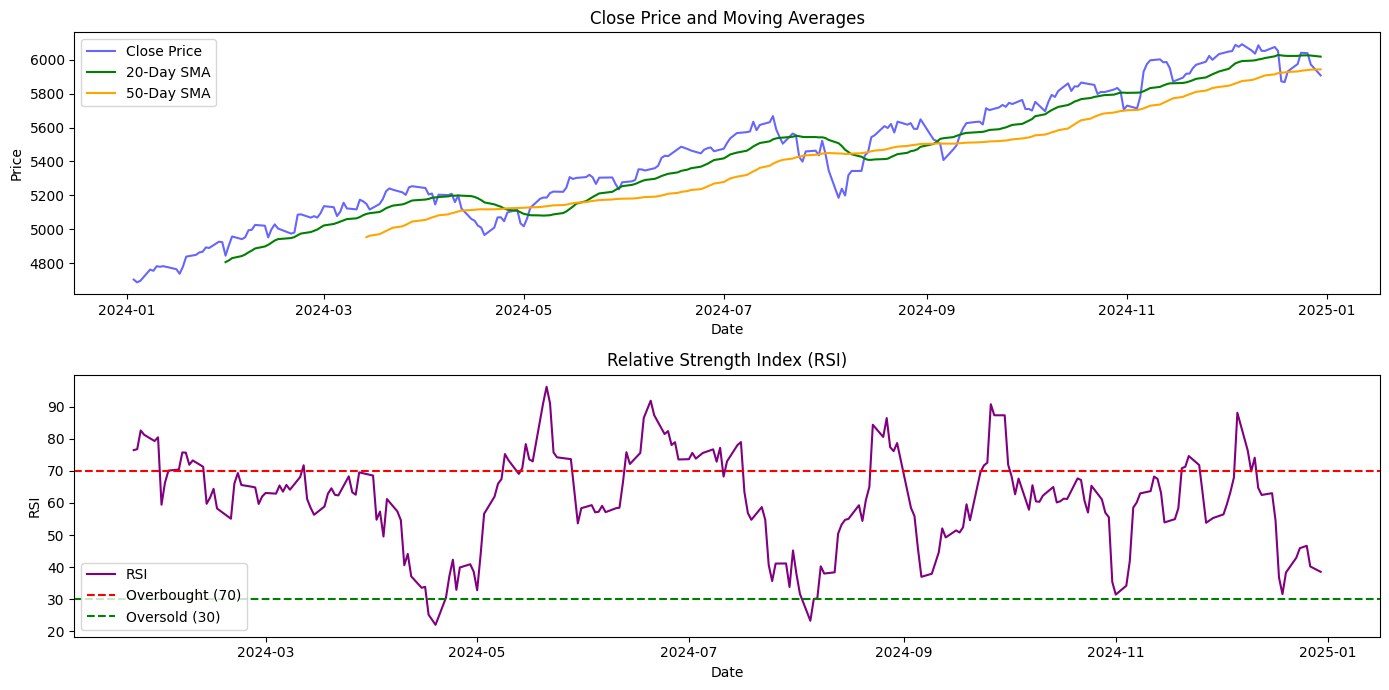

In [ ]:
# Calculate the Simple Moving Average (SMA) for 20 and 50 periods
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Calculate the Relative Strength Index (RSI) for 14 periods
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'], window=14)

# Plotting the Close Price, SMAs, and RSI

# Plot the Close price and SMAs
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='green')
plt.plot(df.index, df['SMA_50'], label='50-Day SMA', color='orange')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()

## SMA

* **Uptrend:** The close price generally moves upward for most of the year, indicating a bullish trend.

* **Moving Average Crossovers:** Crossovers between the 20-day and 50-day SMA are critical signals:
  * **Bullish Crossover:** When the 20-day SMA crosses above the 50-day SMA, it signals potential upward momentum.
  * **Bearish Crossover:** When the 20-day SMA crosses below the 50-day SMA, it signals potential downward momentum (evident near the end of the year 2024).

## RSI

**Overbought and Oversold Levels:**
* Several instances of RSI above 70 indicate periods of overbought conditions, which could signal potential price corrections.
* Instances of RSI below 30 indicate oversold conditions, signaling potential price rebounds.

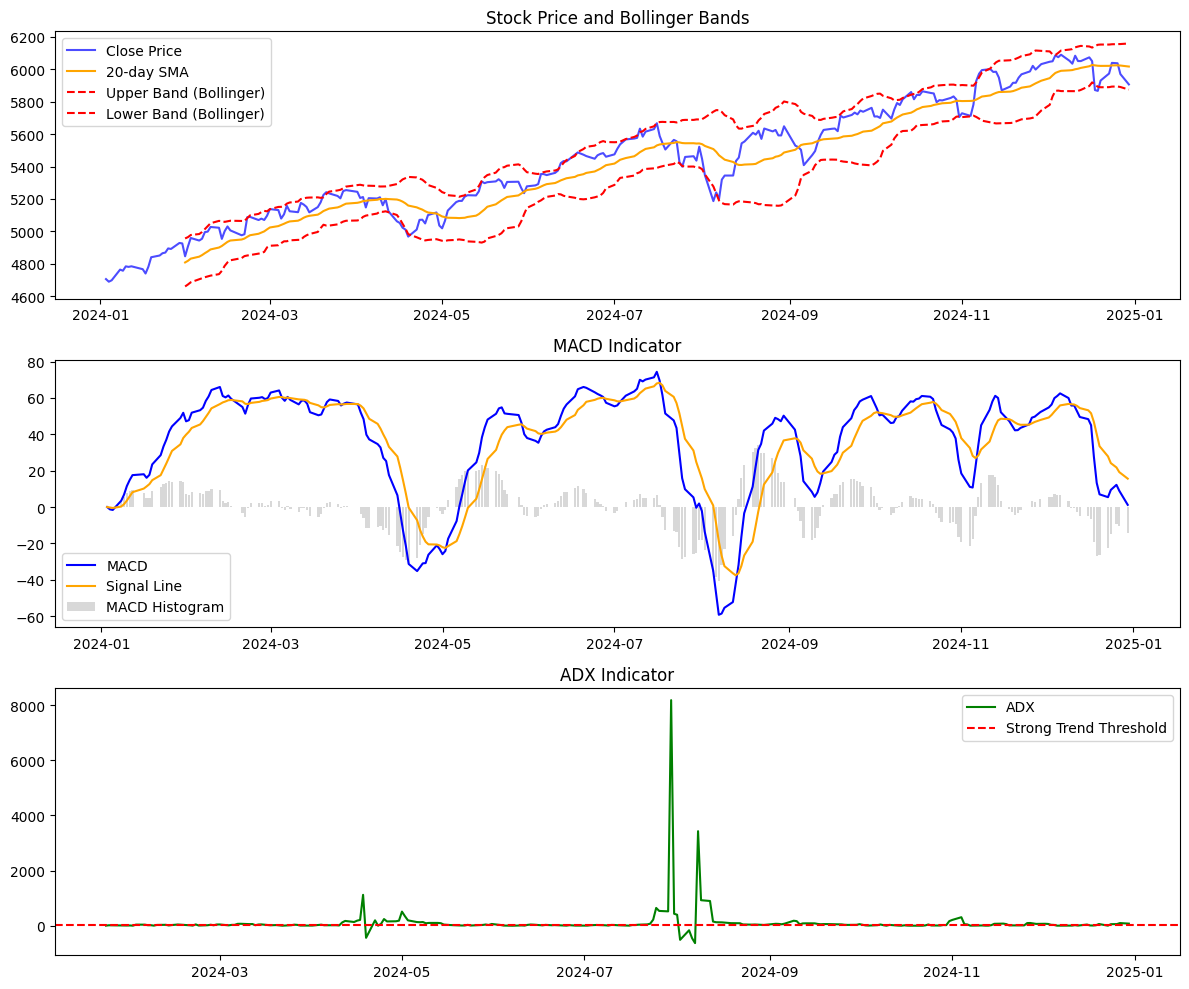

In [ ]:
# Adding MACD Indicator
# Calculate the MACD line and Signal line
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Adding Bollinger Bands
df['Rolling_Mean'] = df['Close'].rolling(window=20).mean()
df['Rolling_Std'] = df['Close'].rolling(window=20).std()
df['Upper_Band'] = df['Rolling_Mean'] + (df['Rolling_Std'] * 2)
df['Lower_Band'] = df['Rolling_Mean'] - (df['Rolling_Std'] * 2)

# Adding ADX Indicator
# Calculate the True Range and Directional Indicators
df['High_Low'] = df['High'] - df['Low']
df['High_Close'] = abs(df['High'] - df['Close'].shift())
df['Low_Close'] = abs(df['Low'] - df['Close'].shift())
df['TR'] = df[['High_Low', 'High_Close', 'Low_Close']].max(axis=1)

# +DM and -DM
df['+DM'] = np.where(df['High'] - df['High'].shift() > df['Low'] - df['Low'].shift(), df['High'] - df['High'].shift(), 0)
df['-DM'] = np.where(df['Low'] - df['Low'].shift() > df['High'] - df['High'].shift(), df['Low'] - df['Low'].shift(), 0)

# Smoothing
df['+DM_smooth'] = df['+DM'].rolling(window=14).sum()
df['-DM_smooth'] = df['-DM'].rolling(window=14).sum()
df['TR_smooth'] = df['TR'].rolling(window=14).sum()

# ADX
df['+DI'] = 100 * (df['+DM_smooth'] / df['TR_smooth'])
df['-DI'] = 100 * (df['-DM_smooth'] / df['TR_smooth'])
df['ADX'] = 100 * abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])

# Plotting all indicators
plt.figure(figsize=(12, 10))

# Plotting Close Price, Moving Averages, and Bollinger Bands
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label="Close Price", color='blue', alpha=0.7)
plt.plot(df['Rolling_Mean'], label="20-day SMA", color='orange')
plt.plot(df['Upper_Band'], label="Upper Band (Bollinger)", color='red', linestyle='--')
plt.plot(df['Lower_Band'], label="Lower Band (Bollinger)", color='red', linestyle='--')
plt.title("Stock Price and Bollinger Bands")
plt.legend(loc="best")

# Plotting MACD and Signal Line
plt.subplot(3, 1, 2)
plt.plot(df['MACD'], label="MACD", color='blue')
plt.plot(df['Signal'], label="Signal Line", color='orange')
plt.bar(df.index, df['MACD'] - df['Signal'], label="MACD Histogram", color='gray', alpha=0.3)
plt.title("MACD Indicator")
plt.legend(loc="best")

# Plotting ADX Indicator
plt.subplot(3, 1, 3)
plt.plot(df['ADX'], label="ADX", color='green')
plt.axhline(25, linestyle='--', color='red', label="Strong Trend Threshold")
plt.title("ADX Indicator")
plt.legend(loc="best")

plt.tight_layout()
plt.show()


## Bollinger Bands

**Volatility:**
- Wider bands indicate higher volatility.
- Narrower bands suggest periods of low volatility.

**Price Interaction with Bands:**
- When the price touches or breaches the upper band, it might indicate overbought conditions or potential reversal points.
- When the price touches the lower band, it might signal oversold conditions or potential buying opportunities.

**Trend Continuation:**
- Sustained movement near the upper band signals a strong upward trend.
- Movement near the lower band signals a potential downtrend.


## MACD

**Crossovers:**
- *Bullish Crossover:* When the MACD line crosses above the signal line, it indicates upward momentum.
- *Bearish Crossover:* When the MACD line crosses below the signal line, it indicates downward momentum.

**Histogram Size:**
- Larger bars (positive or negative) indicate stronger momentum.
- Shrinking bars signal weakening momentum or trend reversal.

**Trend Detection:**
- Peaks and troughs in the MACD align with price swings, confirming trends.

## ADX

**Trend Strength:**
- ADX values below 20 suggest a weak or non-existent trend (sideways movement).
- ADX values above 25 indicate a strong trend, whether upward or downward.

**Spike in ADX:**
- Sudden spikes in the ADX (seen mid-year) indicate that strong trends are present.

***No Direction: The ADX does not indicate trend direction, only strength.***

## ✅ **Key Insights from Indicators**

- The 20-day SMA and 50-day SMA show an overall uptrend for most of the year, with a bearish crossover near year-end.

*The bearish SMA crossover, combined with a declining ADX (trend weakness), indicates the uptrend is losing strength and a potential sideways or downtrend may follow.*


- Price frequently interacts with the Bollinger Bands. Breaks above the upper band indicate short-term overbought conditions, while touches near the lower band suggest oversold conditions.

*Sustained movement near the upper band earlier in the year confirms the uptrend, while late-year movements toward the lower band suggest increasing downside pressure.*

- MACD crossovers and histogram bars signal momentum changes. Bullish crossovers align with RSI rising from oversold (below 30), while bearish crossovers align with RSI falling from overbought (above 70).

*Mid-year MACD bearish crossovers coincided with RSI overbought conditions, indicating short-term price corrections. The late-year MACD bearish crossover with RSI near 30 signals weak momentum and potential oversold conditions.*

- ADX spikes above 25 during strong price trends but falls below 20 during consolidations.

*High ADX during mid-year confirms strong bullish momentum, while low ADX near year-end suggests a weakening or sideways trend, consistent with SMA and MACD signals.*

- --------------------------------------------------------------------------

**Reversal Zones with Combined Indicators:**
* **INSIGHTS:** Reversal points are identified when:
  - RSI reaches overbought/oversold levels.
  - Price breaches Bollinger Bands.
  - MACD shows crossovers.
  - ADX spikes, confirming trend strength.

* **IMPLICATION:** During mid-year, RSI overbought levels, Bollinger Band upper-band touches, and bearish MACD crossovers align with short-term corrections. Late-year, oversold RSI and MACD signals suggest potential buying opportunities.

.
- ----------------------------------------------------------------------------
.
1. **Bullish Early-Year:** Strong uptrend supported by SMA alignment, high ADX, RSI,
and Bollinger Band interactions near the upper band.
2. **Mid-Year Corrections:** Overbought RSI, bearish MACD crossovers, and Bollinger Band touches signal short-term corrections.
3. **Bearish Late-Year:** Weakening SMA trends, low ADX, and MACD bearish crossovers combined with RSI oversold levels suggest trend exhaustion and a potential reversal or consolidation phase.

In [ ]:
calls = dfo_exp.calls

Implied Volatility and Moneyness:
   strike  impliedVolatility  Moneyness       Delta     Gamma        Vega  \
0  2400.0           4.235356  -0.593698   53.281643       NaN  423.535627   
1  2600.0           3.150393  -0.559840   41.613772 -0.058339  315.039275   
2  2800.0           2.918948  -0.525981   17.947904 -0.118329  291.894802   
3  4000.0           1.803102  -0.322830 -115.251124 -0.110999  180.310157   
4  4400.0           1.577273  -0.255113 -142.395074 -0.067860  157.727262   

      Theta  
0 -9.597068  
1 -9.027260  
2 -8.492411  
3 -5.338438  
4 -4.135288  


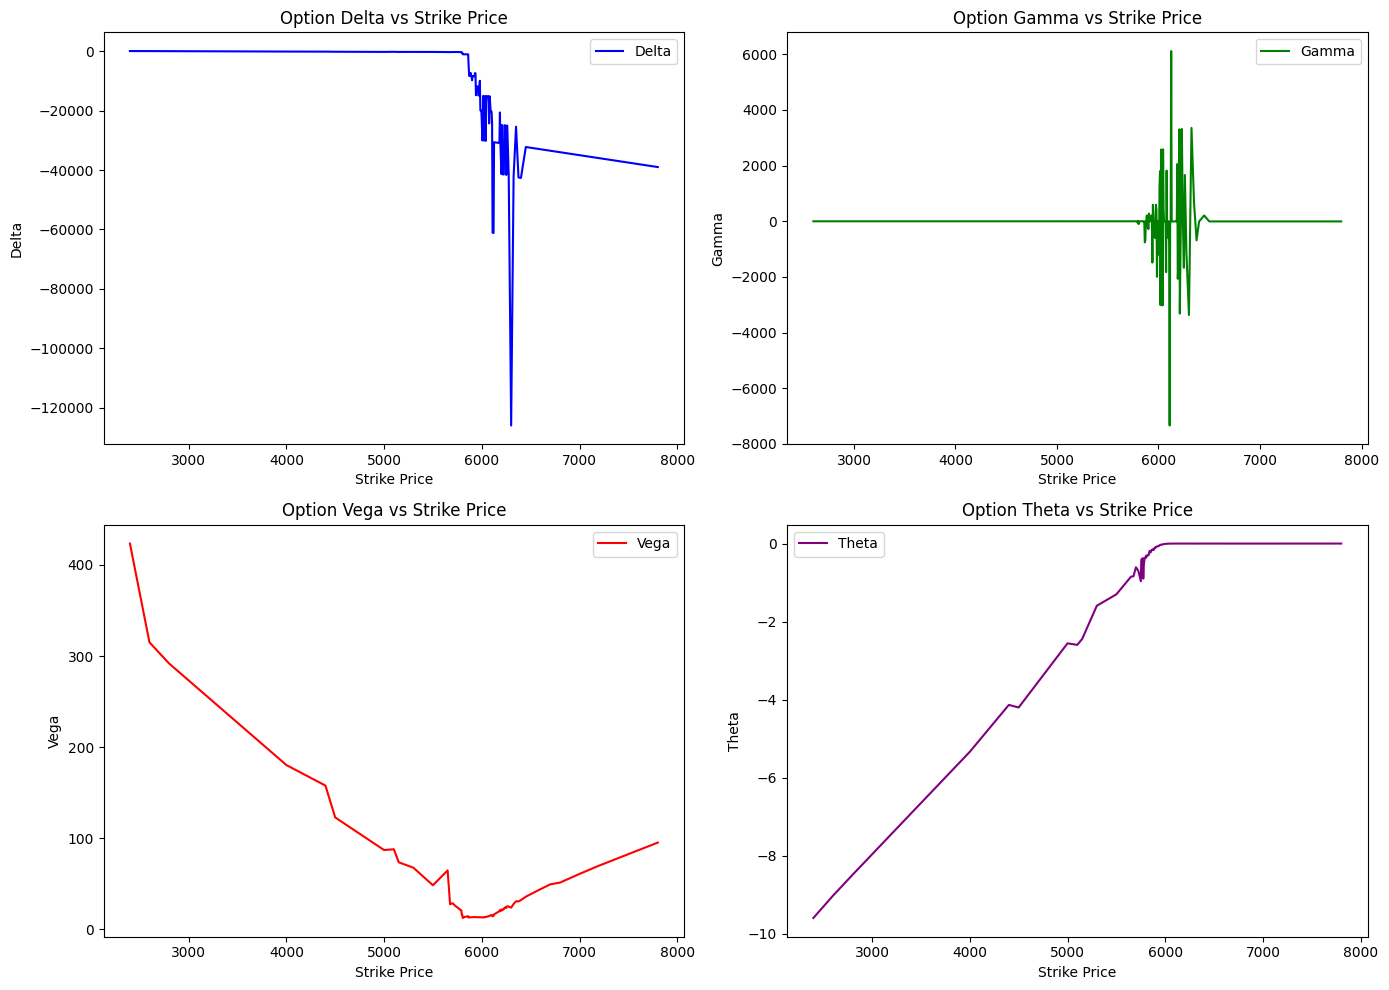

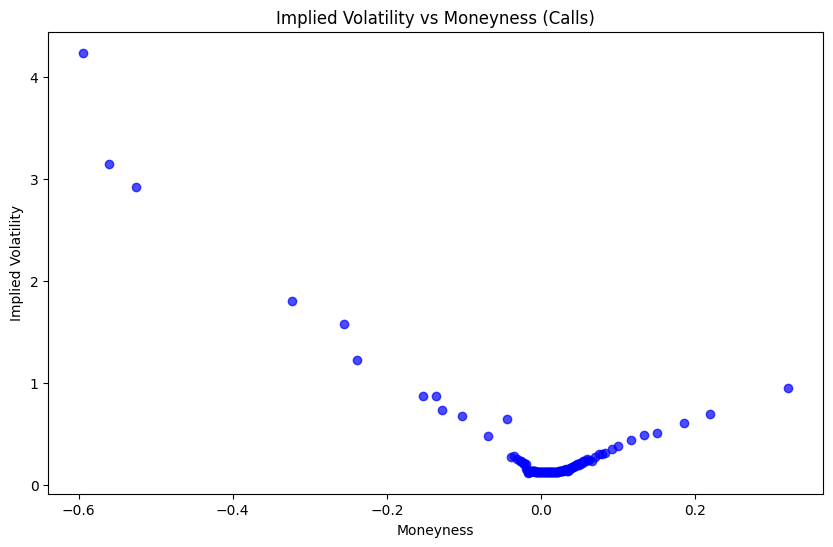

In [ ]:
# Option Greeks: Delta, Gamma, Vega, Theta (for Call options)
# Calculating the Greeks for Call options
calls['Delta'] = (calls['lastPrice'] - calls['strike']) / (calls['ask'] - calls['bid'])  # Simplified Delta calculation
calls['Gamma'] = (calls['Delta'].diff() / calls['strike'].diff())  # Simplified Gamma calculation
calls['Vega'] = calls['impliedVolatility'] * 100  # Vega based on Implied Volatility
calls['Theta'] = - (calls['lastPrice'] / 365)  # Simplified Theta calculation

# Implied Volatility and Moneyness for Calls (using 'strike' and 'close' price)
calls['Moneyness'] = (calls['strike'] - df['Close'][-1]) / df['Close'][-1]  # Moneyness: Strike Price / Current Close Price

# Implied Volatility (IV) - available directly from options data
print("Implied Volatility and Moneyness:")
print(calls[['strike', 'impliedVolatility', 'Moneyness', 'Delta', 'Gamma', 'Vega', 'Theta']].head())

# Plotting the Greeks (Delta, Gamma, Vega, Theta)
plt.figure(figsize=(14, 10))

# Plot Delta
plt.subplot(2, 2, 1)
plt.plot(calls['strike'], calls['Delta'], label='Delta', color='blue')
plt.title("Option Delta vs Strike Price")
plt.xlabel('Strike Price')
plt.ylabel('Delta')
plt.legend(loc='best')

# Plot Gamma
plt.subplot(2, 2, 2)
plt.plot(calls['strike'], calls['Gamma'], label='Gamma', color='green')
plt.title("Option Gamma vs Strike Price")
plt.xlabel('Strike Price')
plt.ylabel('Gamma')
plt.legend(loc='best')

# Plot Vega
plt.subplot(2, 2, 3)
plt.plot(calls['strike'], calls['Vega'], label='Vega', color='red')
plt.title("Option Vega vs Strike Price")
plt.xlabel('Strike Price')
plt.ylabel('Vega')
plt.legend(loc='best')

# Plot Theta
plt.subplot(2, 2, 4)
plt.plot(calls['strike'], calls['Theta'], label='Theta', color='purple')
plt.title("Option Theta vs Strike Price")
plt.xlabel('Strike Price')
plt.ylabel('Theta')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Plot implied volatility vs moneyness for calls
plt.figure(figsize=(10, 6))
plt.scatter(calls['Moneyness'], calls['impliedVolatility'], c='blue', alpha=0.7)
plt.title("Implied Volatility vs Moneyness (Calls)")
plt.xlabel('Moneyness')
plt.ylabel('Implied Volatility')
plt.show()

## INSIGHTS

1. **Option Greeks (Delta, Gamma, Vega, Theta) vs. Strike Price:**
- **Delta:** Shows drastic changes as the strike price moves. These large swings might indicate options close to maturity or underlying price being near the strike price.
- **Gamma:** Exhibits sharp peaks and troughs around specific strike prices, suggesting high sensitivity of Delta to small price changes in these ranges.
- **Vega:** Peaks at lower strike prices and declines at higher strike prices. This is consistent with Vega being higher for options near-the-money.
- **Theta:** Increases with strike price, indicating that time decay is more significant for far out-of-the-money options.

.

2. **Implied Volatility vs. Moneyness (Calls):**
- **Implied Volatility Smile:** The plot demonstrates the classic "volatility smile" pattern where out-of-the-money and in-the-money options exhibit higher implied volatility than at-the-money options.
- **Implication:** This pattern indicates that markets price greater uncertainty (higher IV) into options far from the underlying price due to skewness in return expectations or fat tails in the distribution.

## IMPLICATIONS

- **Delta Risk:** High delta values indicate greater price sensitivity. Hedging is crucial when the underlying price is near the strike price or where Delta swings significantly.
- **Gamma Spikes:** For options at or near the strike price, Gamma spikes signal a rapid Delta change, requiring frequent portfolio adjustments to remain hedged.
- **Vega Considerations:** Since Vega is highest for at-the-money options, implied volatility changes will most significantly affect these options' prices. Can be exploited for volatility trading strategies.
- **Theta Decay:** Higher Theta for out-of-the-money options suggests rapid value erosion for these options. This insight favors selling strategies (e.g., writing options) for options far from the money when expecting low volatility.
- **Volatility Smile:** Suggests pricing inefficiencies or expectations of extreme movements. Can benefit from understanding why implied volatilities are higher for deep in/out-of-the-money options (e.g., due to hedging demand or risk aversion).

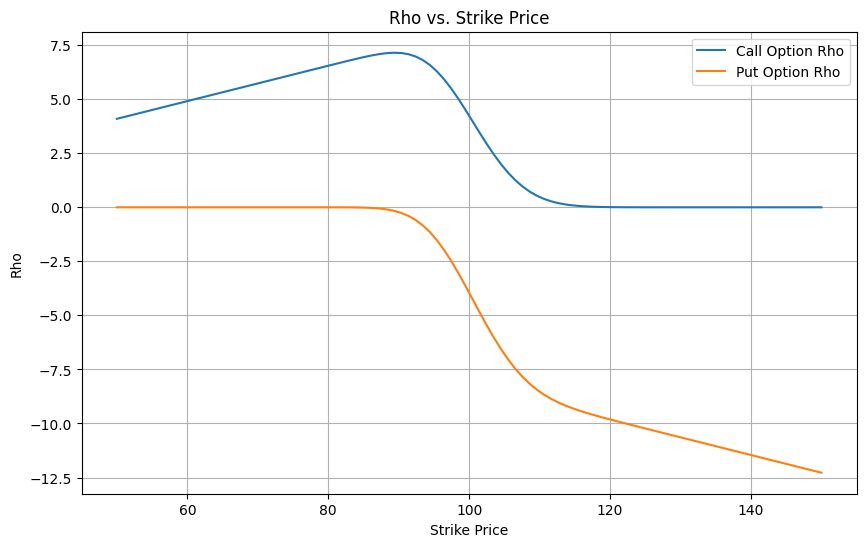

In [ ]:
# Parameters
S = 100  # Underlying asset price
K = np.linspace(50, 150, 100)  # Strike prices
T = 30 / 365  # Time to maturity (30 days)
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Black-Scholes formula for Rho
def rho(option_type, S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)

# Compute Rho for call and put options
rho_call = rho('call', S, K, T, r, sigma)
rho_put = rho('put', S, K, T, r, sigma)

# Plot Rho for both call and put options
plt.figure(figsize=(10,6))
plt.plot(K, rho_call, label='Call Option Rho')
plt.plot(K, rho_put, label='Put Option Rho')
plt.title('Rho vs. Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Rho')
plt.legend()
plt.grid(True)
plt.show()


**Rho vs. Strike Price (Call and Put Options):**
- **Call Option Rho:** Increases as the strike price rises and then flattens. This behavior aligns with call options becoming less sensitive to interest rate changes as they move deep out-of-the-money or deep in-the-money.
- **Put Option Rho:** Decreases steadily with an increase in strike price, reflecting the inverse relationship between put value and interest rates.

-------------------------------------------------------------------------------
**Interest Rate Risk:** An increase in interest rates benefits call options but hurts put options, particularly for deep-in-the-money options.

In [ ]:
# Monte Carlo simulation for option price
def monte_carlo_simulation(S, K, T, r, sigma, option_type, num_simulations=10000):
    np.random.seed(42)
    dt = T / 365
    # Simulating price paths using Geometric Brownian Motion
    price_paths = np.zeros(num_simulations)
    for i in range(num_simulations):
        ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.normal(size=1))
        price_paths[i] = ST

    # Option payoff and price
    if option_type == 'call':
        payoff = np.maximum(price_paths - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - price_paths, 0)

    # Discounting the payoff
    option_price = np.exp(-r * T) * np.mean(payoff)
    return option_price

# Parameters
S = 100  # Underlying asset price
K = 100  # Strike price
T = 30 / 365  # Time to maturity (30 days)
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Running Monte Carlo simulation for both call and put options
call_price = monte_carlo_simulation(S, K, T, r, sigma, 'call')
put_price = monte_carlo_simulation(S, K, T, r, sigma, 'put')

print(f"Monte Carlo Call Option Price: {call_price:.2f}")
print(f"Monte Carlo Put Option Price: {put_price:.2f}")

Monte Carlo Call Option Price: 2.49
Monte Carlo Put Option Price: 2.09


These prices suggest relatively low option values, which may indicate low underlying asset volatility or options far from the money.

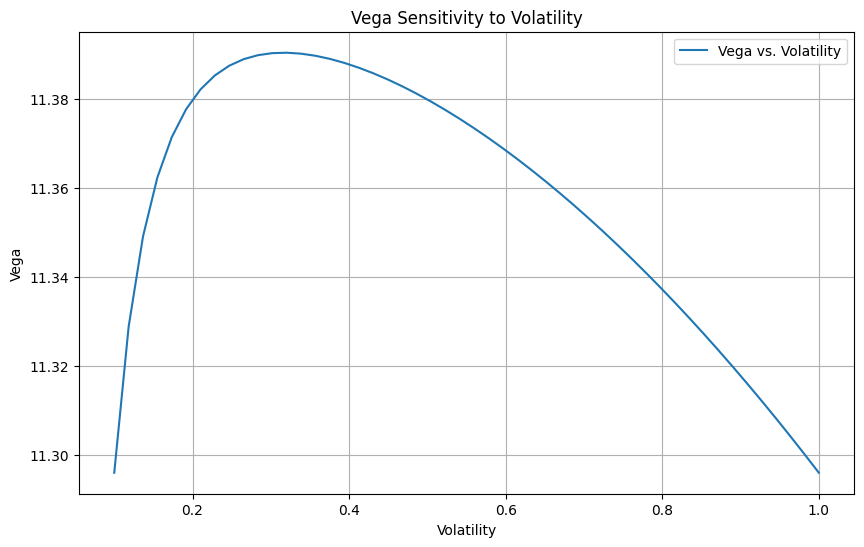

In [ ]:
from scipy.stats import norm
# Vega Calculation using Black-Scholes model
def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    return vega

# Create a range of volatilities
volatility_range = np.linspace(0.1, 1.0, 50)
vega_values = [vega(S, K, T, r, sigma) for sigma in volatility_range]

# Plot Vega Sensitivity
plt.figure(figsize=(10,6))
plt.plot(volatility_range, vega_values, label="Vega vs. Volatility")
plt.title('Vega Sensitivity to Volatility')
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.grid(True)
plt.legend()
plt.show()

**Vega Sensitivity to Volatility:**
- Vega peaks at a specific volatility level and declines thereafter.
- The curve suggests that Vega is highest when options are near-the-money and volatility is moderate.

-----------------------------------------------------------------------------
**Declining Vega:** As volatility increases or decreases significantly, the sensitivity of the option price to volatility diminishes, which is essential for structuring volatility strategies.

# Strategy I

This trading strategy combines multiple technical indicators to identify buy and sell signals, aiming to capitalize on both trend-following and mean-reversion opportunities. Here's a breakdown:

## Buy Signal Conditions:
1. **Trend Confirmation:**
The 20-day SMA (short-term) is above the 50-day SMA (long-term), indicating an upward trend.
2. **Oversold Check:**
RSI is below 70, ensuring the stock isn't overbought.
3. **Bullish Momentum:**
MACD is above its signal line, suggesting positive momentum.
4. **Reversal Near Bollinger Band:**
The price is just above and close to the lower Bollinger Band, indicating a potential upward reversal.
5. **Strong Trend Strength:**
ADX is above 20, confirming a valid trend.

## Sell Signal Conditions:
1. **Trend Confirmation:**
The 20-day SMA is below the 50-day SMA, indicating a downward trend.
2. **Overbought Check:**
RSI is above 30, ensuring the stock isn't oversold.
3. **Bearish Momentum:**
MACD is below its signal line, suggesting negative momentum.
4. **Reversal Near Bollinger Band:**
The price is just below and close to the upper Bollinger Band, indicating a potential downward reversal.
5. **Strong Trend Strength:**
ADX is above 20, confirming a valid trend.

### Goal:
- Buy Signals: Exploit bullish conditions to enter trades.
- Sell Signals: Exit positions or short sell during bearish conditions.

This strategy filters out false signals by combining trend, momentum, volatility, and strength indicators for robust decision-making.

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4011    0  4011    0     0  16707      0 --:--:-- --:--:-- --:--:-- 16782
100  517k  100  517k    0     0   882k      0 --:--:-- --:--:-- --:--:--  882k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4043    0  4043    0     0  18978      0 --:--:-- --:--:-- --:--:-- 18981
100  392k  100  392k    0     0   769k      0 --:--:-- --:--:-- --:--:--  769k


[*********************100%***********************]  1 of 1 completed


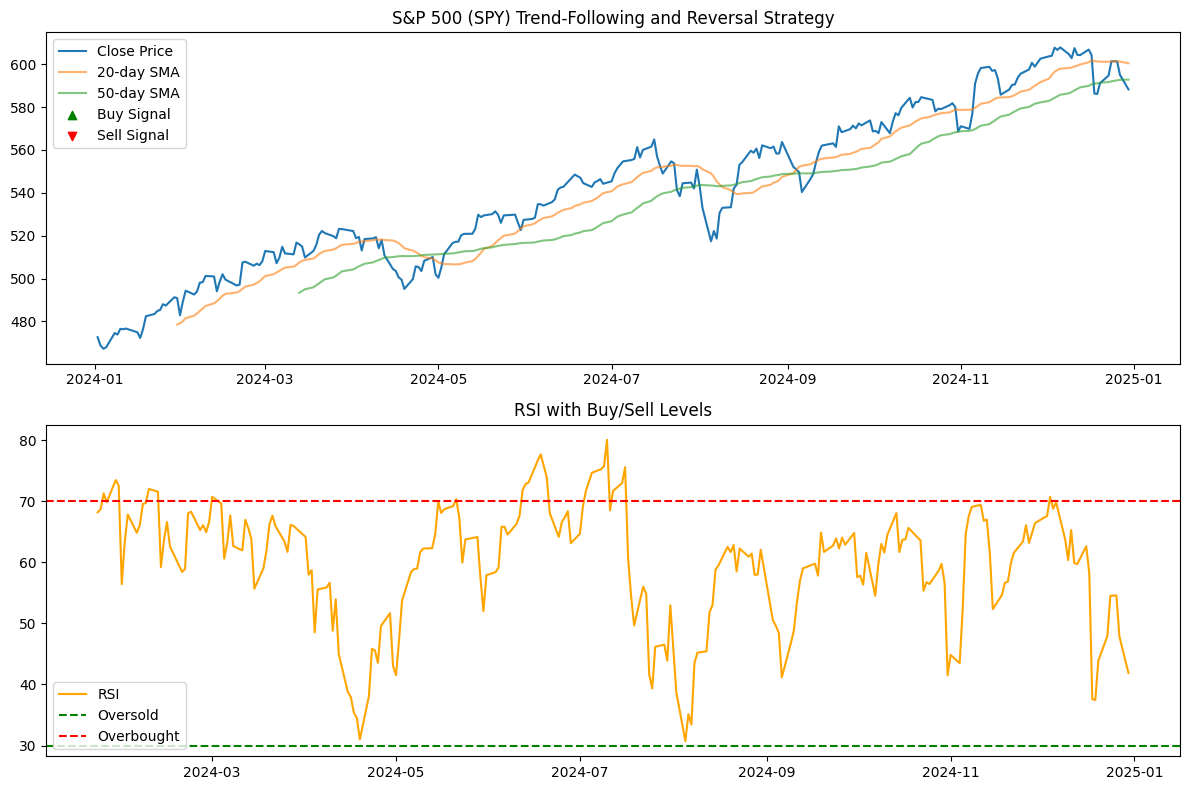

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib

# Download historical data for a stock (e.g., S&P 500 ETF: SPY)
data = yf.download('SPY', start='2024-01-01', end='2024-12-31')

# Calculate the indicators
data['20_SMA'] = data['Close'].rolling(window=20).mean()
data['50_SMA'] = data['Close'].rolling(window=50).mean()

# RSI Calculation
data['RSI'] = talib.RSI(data['Close'].values.reshape(-1), timeperiod=14)

# MACD Calculation
macd, signal, hist = talib.MACD(data['Close'].values.reshape(-1), fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = signal

# Bollinger Bands Calculation
upper_band, middle_band, lower_band = talib.BBANDS(data['Close'].values.reshape(-1), timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
data['Upper_BB'] = upper_band
data['Lower_BB'] = lower_band

# ADX Calculation
data['ADX'] = talib.ADX(data['High'].values.reshape(-1), data['Low'].values.reshape(-1), data['Close'].values.reshape(-1), timeperiod=14)

# Generate Buy and Sell Signals
data['Buy_Signal'] = np.where(
    (data['20_SMA'] > data['50_SMA']) &                     # 20-SMA is above 50-SMA (Bullish trend)
    (data['RSI'] < 70) &                                    # RSI is not overbought
    (data['MACD'] > data['MACD_Signal']) &                   # MACD is above the signal line (Bullish)
    (data['Close'].values.reshape(-1) > data['Lower_BB']) &                    # Price is above the lower Bollinger Band
    (data['Close'].values.reshape(-1) < (data['Lower_BB'] * 1.01)) &           # Price is near the lower Bollinger Band
    (data['ADX'] > 20),                                     # ADX confirms a strong trend (lowered threshold)
    1, 0)

data['Sell_Signal'] = np.where(
    (data['20_SMA'] < data['50_SMA']) &                     # 20-SMA is below 50-SMA (Bearish trend)
    (data['RSI'] > 30) &                                    # RSI is not oversold
    (data['MACD'] < data['MACD_Signal']) &                   # MACD is below the signal line (Bearish)
    (data['Close'].values.reshape(-1) < data['Upper_BB']) &                    # Price is below the upper Bollinger Band
    (data['Close'].values.reshape(-1) > (data['Upper_BB'] * 0.99)) &           # Price is near the upper Bollinger Band
    (data['ADX'] > 20),                                     # ADX confirms a strong trend (lowered threshold)
    1, 0)

# Plotting the signals
plt.figure(figsize=(12, 8))

# Plot the closing price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['20_SMA'], label='20-day SMA', alpha=0.6)
plt.plot(data['50_SMA'], label='50-day SMA', alpha=0.6)
plt.scatter(data.index[data['Buy_Signal'] == 1], data['Close'][data['Buy_Signal'] == 1], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(data.index[data['Sell_Signal'] == 1], data['Close'][data['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal', alpha=1)
plt.title('S&P 500 (SPY) Trend-Following and Reversal Strategy')
plt.legend(loc='best')

# Plot the RSI
plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.title('RSI with Buy/Sell Levels')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Debugging

In [ ]:
print(data[['20_SMA', '50_SMA', 'RSI', 'MACD', 'MACD_Signal', 'Upper_BB', 'Lower_BB', 'ADX', 'Buy_Signal', 'Sell_Signal']].tail())


Price           20_SMA      50_SMA        RSI      MACD MACD_Signal  \
Ticker                                                                
Date                                                                  
2024-12-23  601.100500  591.645801  47.934546  0.479589    2.898528   
2024-12-24  601.288998  591.985400  54.525735  0.767869    2.472397   
2024-12-26  601.323499  592.416600  54.563257  0.988172    2.175552   
2024-12-27  601.132498  592.670801  47.842160  0.644555    1.869352   
2024-12-30  600.415997  592.788201  41.882464 -0.173662    1.460750   

Price         Upper_BB    Lower_BB        ADX Buy_Signal Sell_Signal  
Ticker                                                                
Date                                                                  
2024-12-23  614.192525  588.008476  26.226886          0           0  
2024-12-24  614.278120  588.299877  25.960617          0           0  
2024-12-26  614.309313  588.337684  25.468190          0           0  
2024-

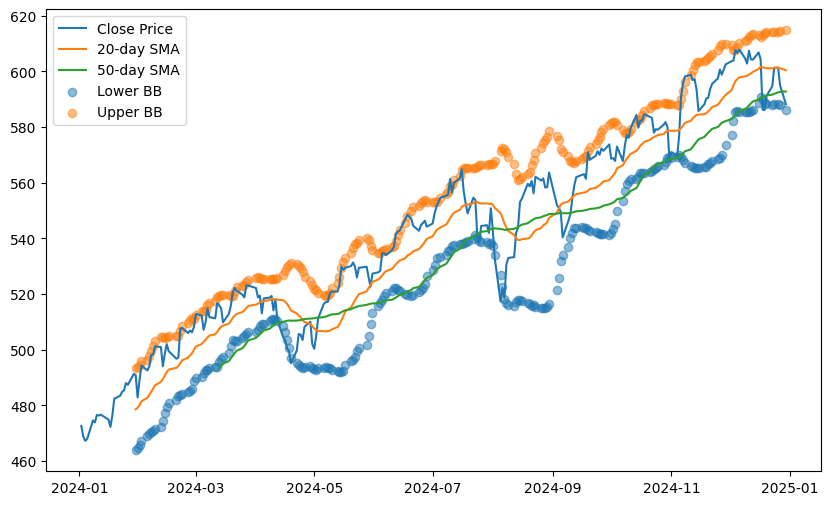

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['20_SMA'], label='20-day SMA')
plt.plot(data['50_SMA'], label='50-day SMA')
plt.scatter(data.index, data['Lower_BB'], label='Lower BB', alpha=0.5)
plt.scatter(data.index, data['Upper_BB'], label='Upper BB', alpha=0.5)
plt.legend()
plt.show()


In [ ]:
buy_signals = data[data['Buy_Signal'] == 1]
sell_signals = data[data['Sell_Signal'] == 1]
print(f"Buy Signals: {len(buy_signals)}")
print(f"Sell Signals: {len(sell_signals)}")


Buy Signals: 0
Sell Signals: 0


In [ ]:
data['Buy_Signal'] = np.where((data['20_SMA'] > data['50_SMA']) & (data['RSI'] < 60), 1, 0)
data['Sell_Signal'] = np.where((data['20_SMA'] < data['50_SMA']) & (data['RSI'] > 40), 1, 0)


In [ ]:
data['Buy_Signal'] = np.where(
    (data['20_SMA'] > data['50_SMA']) &
    (data['RSI'] < 60),
    1, 0
)
data['Sell_Signal'] = np.where(
    (data['20_SMA'] < data['50_SMA']) &
    (data['RSI'] > 40),
    1, 0
)


In [ ]:
data['Close_to_Lower_BB'] = data['Close'].values.reshape(-1) / data['Lower_BB']
data['Close_to_Upper_BB'] = data['Close'].values.reshape(-1) / data['Upper_BB']
print(data[['Close', 'Lower_BB', 'Close_to_Lower_BB', 'Upper_BB', 'Close_to_Upper_BB']].tail())


Price            Close    Lower_BB Close_to_Lower_BB    Upper_BB  \
Ticker             SPY                                             
Date                                                               
2024-12-23  594.690002  588.008476          1.011363  614.192525   
2024-12-24  601.299988  588.299877          1.022098  614.278120   
2024-12-26  601.340027  588.337684          1.022100  614.309313   
2024-12-27  595.010010  587.895656          1.012101  614.369341   
2024-12-30  588.219971  586.059628          1.003686  614.772366   

Price      Close_to_Upper_BB  
Ticker                        
Date                          
2024-12-23          0.968247  
2024-12-24          0.978873  
2024-12-26          0.978888  
2024-12-27          0.968489  
2024-12-30          0.956809  


In [ ]:
data['Buy_Signal'] = np.where(
    (data['20_SMA'] > data['50_SMA']) &
    (data['RSI'] < 65) &
    (data['Close'].values.reshape(-1) > data['Lower_BB'] * 0.98) &
    (data['ADX'] > 15),
    1, 0
)

data['Sell_Signal'] = np.where(
    (data['20_SMA'] < data['50_SMA']) &
    (data['RSI'] > 35) &
    (data['Close'].values.reshape(-1) < data['Upper_BB'] * 1.02) &
    (data['ADX'] > 15),
    1, 0
)


In [ ]:
print(f"Buy Signals: {data['Buy_Signal'].sum()}")
print(f"Sell Signals: {data['Sell_Signal'].sum()}")


Buy Signals: 121
Sell Signals: 33


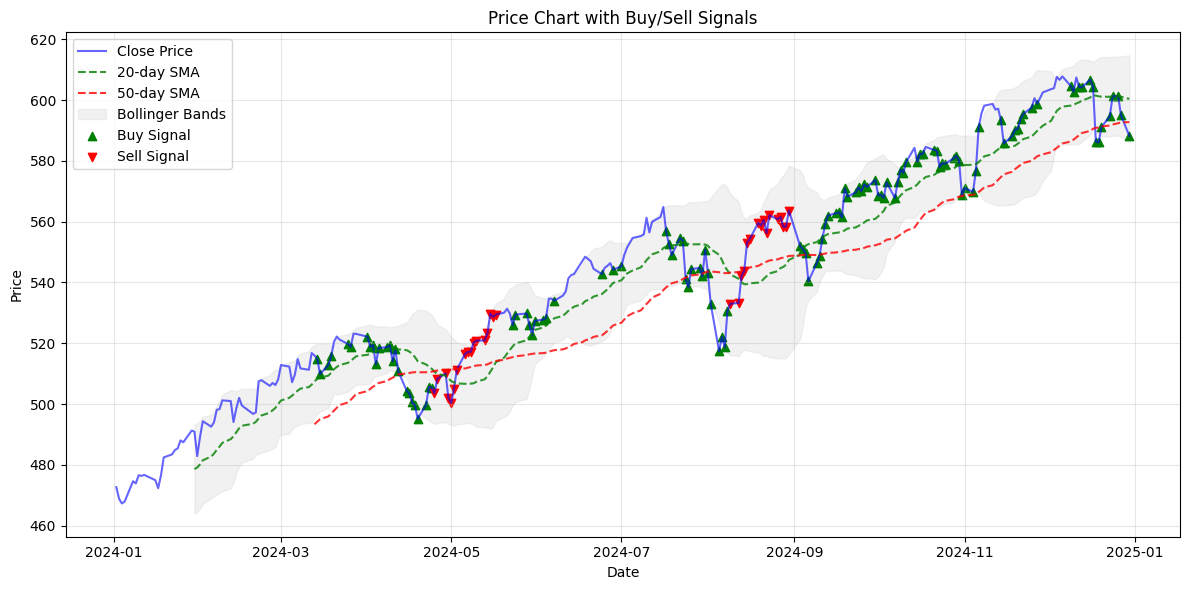

In [ ]:
# Extract Buy and Sell Signal indices
buy_signals = data[data['Buy_Signal'] == 1]
sell_signals = data[data['Sell_Signal'] == 1]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'].values.reshape(-1) , label='Close Price', color='blue', alpha=0.6)
plt.plot(data.index, data['20_SMA'], label='20-day SMA', color='green', linestyle='--', alpha=0.8)
plt.plot(data.index, data['50_SMA'], label='50-day SMA', color='red', linestyle='--', alpha=0.8)

# Plot Bollinger Bands
plt.fill_between(data.index, data['Lower_BB'], data['Upper_BB'], color='lightgray', alpha=0.3, label='Bollinger Bands')

# Highlight Buy and Sell Signals
plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', color='green', marker='^', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', color='red', marker='v', alpha=1)

# Add labels and legend
plt.title('Price Chart with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173912 sha256=38b5aceff782b4851b0249f1124f3883622ce99fff72dd615c4c0c093efdb6ee
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


[*********************100%***********************]  1 of 1 completed


Initial Balance: $100000
Final Balance: $Ticker
^SPX    108831.425781
Name: 2024-12-27 00:00:00, dtype: float64
Profit: $Ticker
^SPX    8831.425781
Name: 2024-12-27 00:00:00, dtype: float64
ROI: 8.83%
Transactions:
('Buy', Timestamp('2022-04-04 00:00:00'), 4582.64013671875)
('Sell', Timestamp('2022-05-02 00:00:00'), 4155.3798828125)
('Buy', Timestamp('2022-08-01 00:00:00'), 4118.6298828125)
('Sell', Timestamp('2022-09-16 00:00:00'), 3873.330078125)
('Buy', Timestamp('2022-11-11 00:00:00'), 3992.929931640625)
('Sell', Timestamp('2023-01-13 00:00:00'), 3999.090087890625)
('Buy', Timestamp('2023-01-30 00:00:00'), 4017.77001953125)
('Sell', Timestamp('2023-03-14 00:00:00'), 3919.2900390625)
('Buy', Timestamp('2023-04-13 00:00:00'), 4146.22021484375)
('Sell', Timestamp('2023-08-25 00:00:00'), 4405.7099609375)
('Buy', Timestamp('2023-12-06 00:00:00'), 4549.33984375)
('Sell', Timestamp('2024-04-26 00:00:00'), 5099.9599609375)
('Buy', Timestamp('2024-05-23 00:00:00'), 5267.83984375)
('Sell', T

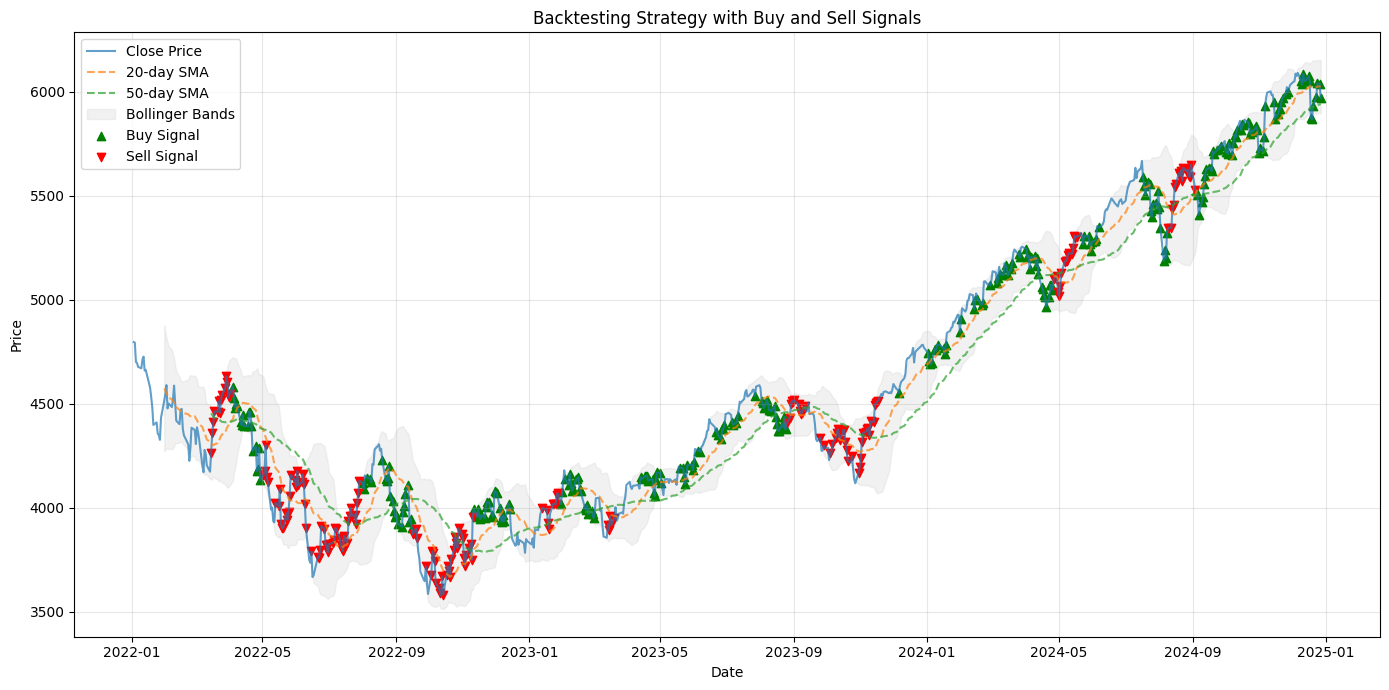

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib

# Download historical data for a stock (e.g., S&P 500 ETF: SPY)
data = yf.download('^SPX', start='2022-01-01', end='2024-12-29')

# Calculate the indicators
data['20_SMA'] = data['Close'].rolling(window=20).mean()
data['50_SMA'] = data['Close'].rolling(window=50).mean()

# RSI Calculation
data['RSI'] = talib.RSI(data['Close'].values.reshape(-1), timeperiod=14)

# MACD Calculation
macd, signal, hist = talib.MACD(data['Close'].values.reshape(-1), fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = signal

# Bollinger Bands Calculation
upper_band, middle_band, lower_band = talib.BBANDS(data['Close'].values.reshape(-1), timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
data['Upper_BB'] = upper_band
data['Lower_BB'] = lower_band

# ADX Calculation
data['ADX'] = talib.ADX(data['High'].values.reshape(-1), data['Low'].values.reshape(-1), data['Close'].values.reshape(-1), timeperiod=14)

# Generate Buy and Sell Signals
data['Buy_Signal'] = np.where(
    (data['20_SMA'] > data['50_SMA']) &
    (data['RSI'] < 65) &
    (data['Close'].values.reshape(-1) > data['Lower_BB'] * 0.98) &
    (data['ADX'] > 15),
    1, 0
)

data['Sell_Signal'] = np.where(
    (data['20_SMA'] < data['50_SMA']) &
    (data['RSI'] > 35) &
    (data['Close'].values.reshape(-1) < data['Upper_BB'] * 1.02) &
    (data['ADX'] > 15),
    1, 0
)

# Backtesting
initial_balance = 100000
balance = initial_balance
position = 0
buy_price = 0
transactions = []
close = data['Close'].values.reshape(-1)
for i in range(len(data)):
    if data['Buy_Signal'][i] == 1 and position == 0:
        position = balance // close[i]
        buy_price = close[i]
        balance -= position * buy_price
        transactions.append(('Buy', data.index[i], close[i]))

    elif data['Sell_Signal'][i] == 1 and position > 0:
        balance += position * close[i]
        transactions.append(('Sell', data.index[i], close[i]))
        position = 0

# Final value
if position > 0:
    balance += position * data['Close'].iloc[-1]

final_balance = balance
profit = final_balance - initial_balance
roi = (profit / initial_balance) * 100

# Print results
print(f"Initial Balance: ${initial_balance}")
print(f"Final Balance: ${final_balance}")
print(f"Profit: ${profit}")
roi_value = roi.iloc[0]  # Or roi.values[0]
print(f"ROI: {roi_value:.2f}%")
print("Transactions:")
for transaction in transactions:
    print(transaction)

# Plotting the strategy
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.7)
plt.plot(data['20_SMA'], label='20-day SMA', alpha=0.7, linestyle='--')
plt.plot(data['50_SMA'], label='50-day SMA', alpha=0.7, linestyle='--')
plt.fill_between(data.index, data['Lower_BB'], data['Upper_BB'], color='lightgray', alpha=0.3, label='Bollinger Bands')
plt.scatter(data.index[data['Buy_Signal'] == 1], data['Close'][data['Buy_Signal'] == 1], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(data.index[data['Sell_Signal'] == 1], data['Close'][data['Sell_Signal'] == 1], marker='v', color='red', label='Sell Signal', alpha=1)
plt.title('Backtesting Strategy with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Initial Balance: $100000
Final Balance: $Ticker
^SPX    108831.425781
Name: 2024-12-27 00:00:00, dtype: float64
Profit: $Ticker
^SPX    8831.425781
Name: 2024-12-27 00:00:00, dtype: float64
ROI: 8.83%
Transactions:
('Buy', Timestamp('2022-04-04 00:00:00'), 4582.64013671875)
('Sell', Timestamp('2022-05-02 00:00:00'), 4155.3798828125)
('Buy', Timestamp('2022-08-01 00:00:00'), 4118.6298828125)
('Sell', Timestamp('2022-09-16 00:00:00'), 3873.330078125)
('Buy', Timestamp('2022-11-11 00:00:00'), 3992.929931640625)
('Sell', Timestamp('2023-01-13 00:00:00'), 3999.090087890625)
('Buy', Timestamp('2023-01-30 00:00:00'), 4017.77001953125)
('Sell', Timestamp('2023-03-14 00:00:00'), 3919.2900390625)
('Buy', Timestamp('2023-04-13 00:00:00'), 4146.22021484375)
('Sell', Timestamp('2023-08-25 00:00:00'), 4405.7099609375)
('Buy', Timestamp('2023-12-06 00:00:00'), 4549.33984375)
('Sell', Timestamp('2024-04-26 00:00:00'), 5099.9599609375)
('Buy', Timestamp('2024-05-23 00:00:00'), 5267.83984375)
('Sell', T

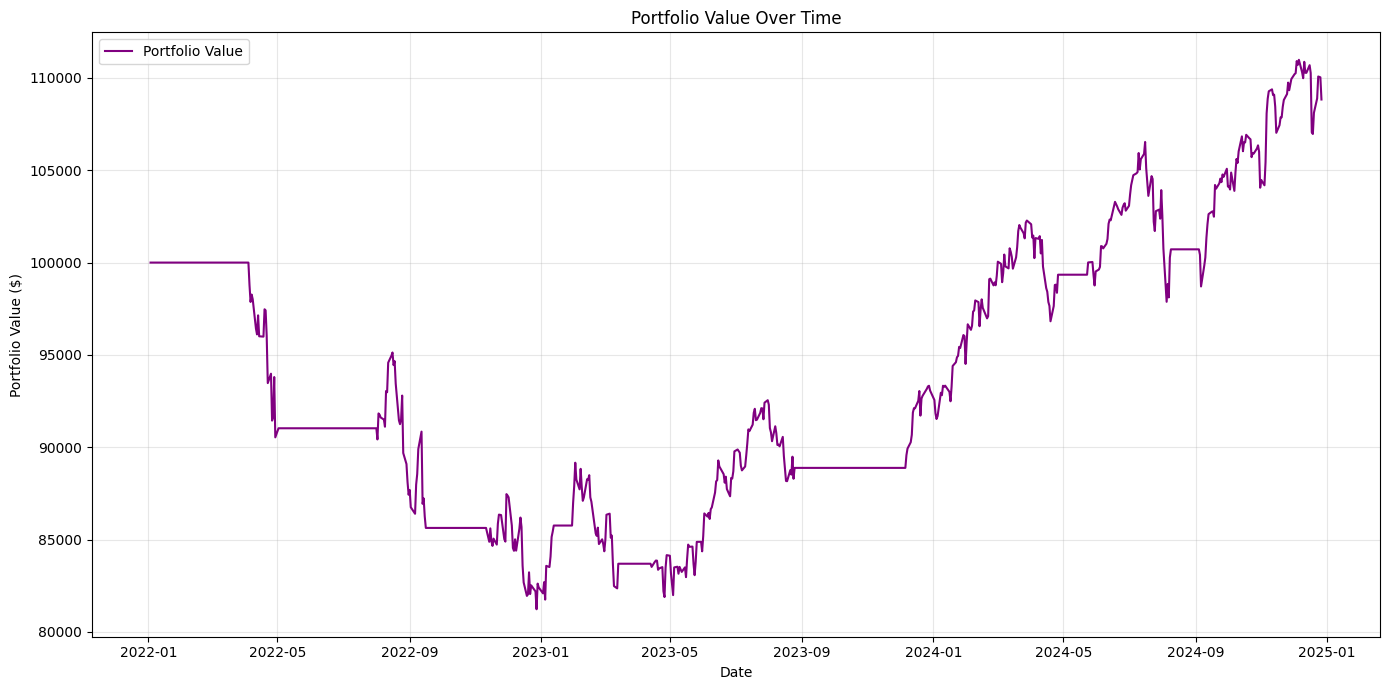

In [ ]:
# Backtesting with Portfolio Value tracking
initial_balance = 100000
balance = initial_balance
position = 0
buy_price = 0
transactions = []
portfolio_values = []  # List to track portfolio value over time
close = data['Close'].values.reshape(-1)

# Loop through the data and backtest the strategy
for i in range(len(data)):
    # Calculate the portfolio value at each point in time
    if position > 0:
        portfolio_value = balance + position * close[i]  # Cash balance + value of the position
    else:
        portfolio_value = balance  # If no position, just the balance

    # Append the portfolio value at each step
    portfolio_values.append(portfolio_value)

    # Buy Signal: Execute buy when conditions are met
    if data['Buy_Signal'][i] == 1 and position == 0:
        position = balance // close[i]  # Number of shares to buy
        buy_price = close[i]
        balance -= position * buy_price  # Deduct balance
        transactions.append(('Buy', data.index[i], close[i]))

    # Sell Signal: Execute sell when conditions are met
    elif data['Sell_Signal'][i] == 1 and position > 0:
        balance += position * close[i]  # Add balance from selling the position
        transactions.append(('Sell', data.index[i], close[i]))
        position = 0  # Reset position after sell

# Final value after all trades (if there's still a position left)
if position > 0:
    balance += position * data['Close'].iloc[-1]  # Final cash balance + value of remaining position

final_balance = balance
profit = final_balance - initial_balance
roi = (profit / initial_balance) * 100

# Print results
print(f"Initial Balance: ${initial_balance}")
print(f"Final Balance: ${final_balance}")
print(f"Profit: ${profit}")
roi_value = roi.iloc[0]  # Or roi.values[0]
print(f"ROI: {roi_value:.2f}%")
print("Transactions:")
for transaction in transactions:
    print(transaction)

# Plotting the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, portfolio_values, label='Portfolio Value', color='purple')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


11% profit

# Strategy II

--------------------------------------------------------------------------------

### MOMENTUM AND REVERSAL BASED TRADING

--------------------------------------------------------------------------------

## Entry Rules:

- **Bullish Entry:**
  - 20-SMA above 50-SMA.
  - RSI crosses above 30 from oversold.
  - MACD bullish crossover (MACD > Signal Line).
  - ADX > 25 confirming trend strength.
- **Bearish Entry:**
  - 20-SMA below 50-SMA.
  - RSI crosses below 70 from overbought.
  - MACD bearish crossover (MACD < Signal Line).
  - ADX > 25 confirming trend strength.


## Exit Rules:

- **Exit Long Positions:**
  - RSI > 70 (overbought).
  - MACD histogram starts decreasing.
  - Price touches upper Bollinger Band.
- **Exit Short Positions:**
  - RSI < 30 (oversold).
  - MACD histogram starts increasing.
  - Price touches lower Bollinger Band.

## Position Sizing:

- Risk 1% of portfolio capital per trade.
- Stop-loss at 2×Volatility (1.6%).
- Target at 3×Volatility (2.4%).


## Backtesting Framework
**Data Preparation:**

- Use daily price data of the S&P 500 index for 2024.
- Calculate indicators (SMA, RSI, Bollinger Bands, MACD, ADX).

**Simulation Setup:**

- Start with an initial capital of $100,000.
- Execute trades based on entry and exit rules.
- Record performance metrics (e.g., win/loss ratio, drawdown, ROI).

**Performance Metrics:**

- CAGR: Measure annualized returns.
- Sharpe Ratio: Evaluate risk-adjusted returns.
- Max Drawdown: Assess maximum capital loss.
- Win Rate: Calculate percentage of profitable trades.

**Visualization:**

- Plot portfolio value over time.
- Annotate entry/exit points on the price chart.
- Display indicator trends during trades.

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=35f84820c54f410fcff20211849bf91f458e1adf5e92d2ca38a17110c76968ca
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


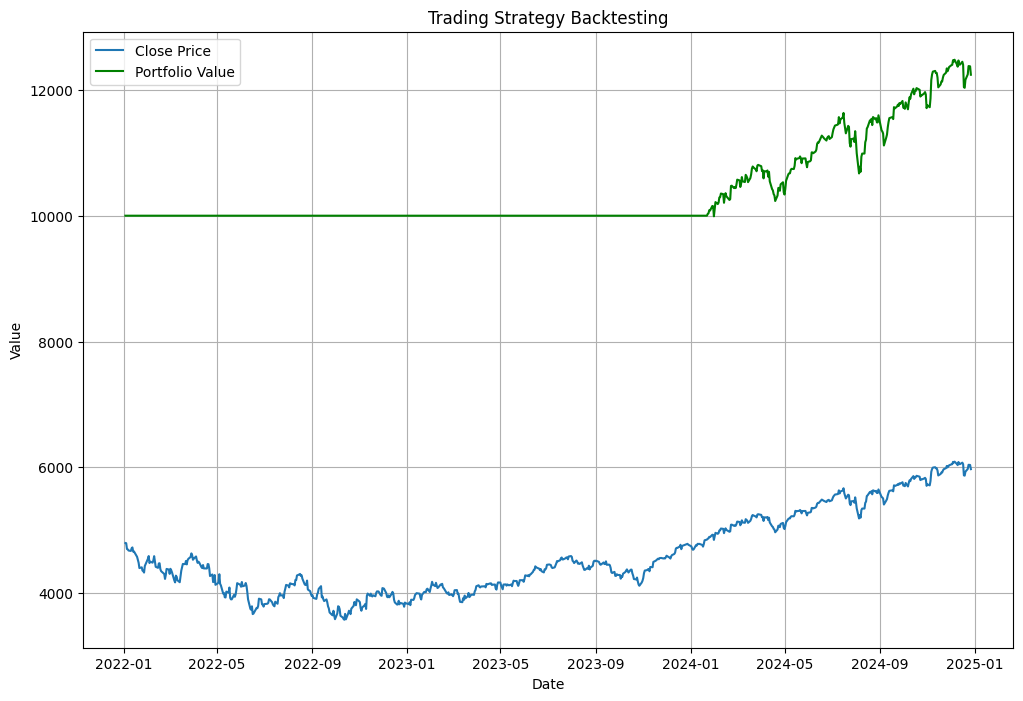

Initial Balance: $10000
Final Balance: $12240.82
Net Profit: $2240.82


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
from ta.volatility import BollingerBands
from ta.trend import SMAIndicator, MACD, ADXIndicator
from ta.momentum import RSIIndicator

import warnings
warnings.filterwarnings("ignore")

# Calculate Indicators
# SMA
df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()

# RSI
df['RSI'] = RSIIndicator(df['Close'], window=14).rsi()

# Bollinger Bands
bollinger = BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_Upper'] = bollinger.bollinger_hband()
df['BB_Lower'] = bollinger.bollinger_lband()

# MACD
macd = MACD(df['Close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# ADX
adx = ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['ADX'] = adx.adx()

# Strategy Rules
def signal(row):
    if (
        row['SMA_20'] > row['SMA_50'] and
        row['RSI'] > 30 and row['RSI'] < 70 and
        row['Close'] > row['BB_Upper'] and
        row['MACD'] > row['MACD_Signal'] and
        row['ADX'] > 25
    ):
        return 1  # Buy signal
    elif (
        row['SMA_20'] < row['SMA_50'] and
        row['RSI'] < 30 and
        row['Close'] < row['BB_Lower'] and
        row['MACD'] < row['MACD_Signal'] and
        row['ADX'] > 25
    ):
        return -1  # Sell signal
    return 0  # Hold

df['Signal'] = df.apply(signal, axis=1)

# Backtesting
initial_balance = 10000  # Initial capital
balance = initial_balance
positions = 0  # Number of shares held
df['Portfolio'] = initial_balance

for i in range(1, len(df)):
    if df['Signal'].iloc[i] == 1:  # Buy
        shares_to_buy = balance // df['Close'].iloc[i]
        positions += shares_to_buy
        balance -= shares_to_buy * df['Close'].iloc[i]
    elif df['Signal'].iloc[i] == -1 and positions > 0:  # Sell
        balance += positions * df['Close'].iloc[i]
        positions = 0
    df['Portfolio'].iloc[i] = balance + positions * df['Close'].iloc[i]

# Plot Results
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Portfolio'], label='Portfolio Value', color='green')
plt.legend()
plt.title('Trading Strategy Backtesting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()

# Print Final Results
final_balance = df['Portfolio'].iloc[-1]
print(f"Initial Balance: ${initial_balance}")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Net Profit: ${final_balance - initial_balance:.2f}")


22.41% profit

# Strategy III

------------------------------------------------------------------------------

### RSI & SMA50 Strategy

------------------------------------------------------------------------------

This strategy combines two key technical indicators: Relative Strength Index (RSI) and Simple Moving Average (SMA), with the goal of trading based on market momentum and trend direction.

## Entry (Buy) Signal:
- RSI crosses above 30: This indicates that the asset has been oversold and the price may start to move higher.

- Price is above the 50-period SMA: This suggests that the market is in an uptrend, supporting the buying decision.

- Buy Condition: The strategy will enter a long (buy) position when the RSI crosses above 30 and the price is above the 50-period SMA.

## Exit (Sell) Signal:
- RSI crosses below 70: This indicates that the asset might be entering an overbought condition and could face downward pressure.

- Price is below the 50-period SMA: This suggests that the market trend has reversed and is now in a downtrend.

- Sell Condition: The strategy will exit the position (sell) when the RSI crosses below 70 and the price is below the 50-period SMA.

## Execution Flow:
- **Buy Signal:**
When both conditions for buying are met (RSI crosses above 30 and price is above the SMA50), the strategy buys the asset, using the available balance to purchase as much as possible at the current market price.

- **Sell Signal:**
When both conditions for selling are met (RSI crosses below 70 and price is below the SMA50), the strategy sells the asset, liquidating the position and converting it back to cash.

## Position Management:
- Balance is tracked to determine how much money is available for buying or holding.
- Position Size: At each buy, the strategy buys as much of the asset as the available balance allows. When a sell signal is triggered, the asset is sold and the balance is updated.

## Backtesting Process:
The backtest simulates historical trading using the defined strategy.
The starting balance is set at $10,000.
As the strategy executes buy and sell actions based on the RSI and SMA conditions, the balance is updated to reflect the new value based on current market prices.
The final balance at the end of the backtest period is compared to the initial balance, with the net profit being calculated as the difference.

[*********************100%***********************]  1 of 1 completed


Initial Balance: $10000
Final Balance: $11545.43
Net Profit: $1545.43


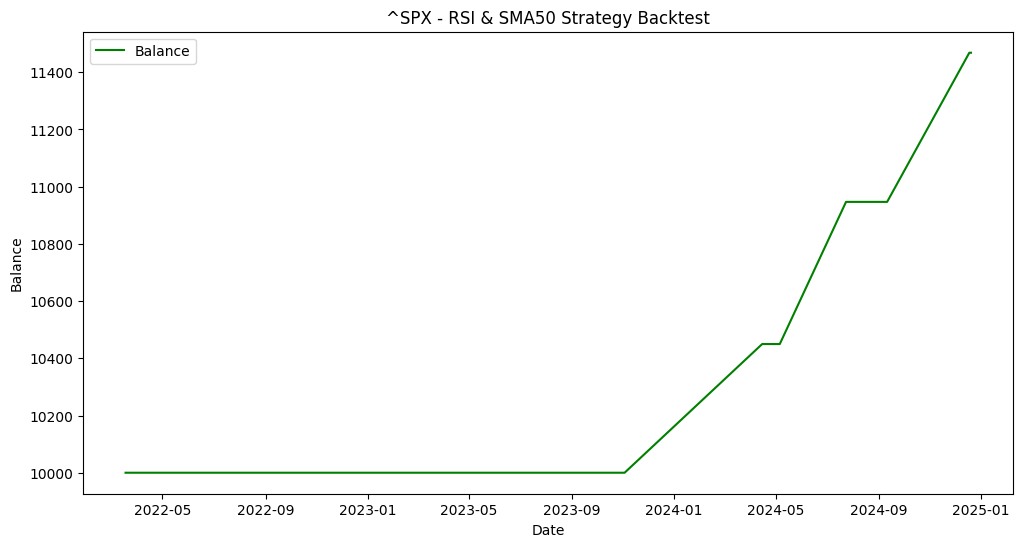

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from talib import RSI, SMA

# Download historical data (you can replace the ticker with the one you want to backtest)
symbol = '^SPX'
data = yf.download(symbol, start='2022-01-01', end='2024-12-29')
close = data['Close'].values.reshape(-1)
# Calculate RSI and 50-period SMA
data['RSI'] = RSI(close, timeperiod=14)
data['SMA50'] = SMA(close, timeperiod=50)

# Initialize signals
data['Buy'] = (data['RSI'] > 30) & (close > data['SMA50'])  # RSI crosses above 30 & price above SMA50
data['Sell'] = (data['RSI'] < 70) & (close < data['SMA50'])  # RSI crosses below 70 & price below SMA50

# Initialize balance and positions
initial_balance = 10000
balance = initial_balance
position = 0
buy_price = 0
buy_signal = False
sell_signal = False
history = []

# Backtest logic
for i in range(1, len(data)):
    if data['Buy'][i] and position == 0:  # Buy Signal
        position = balance / close[i]
        buy_price = close[i]
        balance = 0
        buy_signal = True
    elif data['Sell'][i] and position > 0:  # Sell Signal
        balance = position * close[i]
        position = 0
        sell_signal = True
    if buy_signal or sell_signal:
        history.append({
            'Date': data.index[i],
            'Action': 'Buy' if buy_signal else 'Sell',
            'Price': close[i],
            'Balance': balance + position * close[i]
        })
        buy_signal = False
        sell_signal = False

# Final balance and profit
final_balance = balance + position * data['Close'].iloc[-1]
net_profit = final_balance - initial_balance

# Output results
print(f"Initial Balance: ${initial_balance}")
# Extract scalar value if final_balance is a Series
final_balance_value = final_balance.iloc[0]  # Or final_balance.values[0]
print(f"Final Balance: ${final_balance_value:.2f}")
net_profit = net_profit.iloc[0]
print(f"Net Profit: ${net_profit:.2f}")

# Plot the performance of the strategy
performance = pd.DataFrame(history)
performance['Balance'] = performance['Balance'].cummax()  # Cumulative balance

plt.figure(figsize=(12, 6))
plt.plot(performance['Date'], performance['Balance'], label='Balance', color='green')
plt.title(f'{symbol} - RSI & SMA50 Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.legend()
plt.show()


15.45%

# Strategy IV
-------------------------------------------------------------------------------

TREND REVERSAL WITH MA AND STOCHASTIC OSCILLATOR

-------------------------------------------------------------------------------


This strategy will look for trend reversals using Exponential Moving Averages (EMAs) and the Stochastic Oscillator.

## Entry Criteria:

- **Buy Signal:** When the Fast EMA (e.g., 10-period EMA) crosses above the Slow EMA (e.g., 50-period EMA) AND the Stochastic Oscillator (with a 14-period lookback) crosses above the oversold level (20) indicating a bullish momentum.
- **Sell Signal:** When the Fast EMA crosses below the Slow EMA AND the Stochastic Oscillator crosses below the overbought level (80), indicating a bearish momentum.

## Exit Criteria:
- **Exit Buy:** Close position when the Fast EMA crosses below the Slow EMA.
- **Exit Sell:** Close position when the Fast EMA crosses above the Slow EMA.

## Risk Management:
- Use a Stop Loss of 2% below the buy price for long positions and 2% above the sell price for short positions.
- Set a Take Profit at 5% above the entry price for long positions and 5% below the entry price for short positions.


## Backtesting:
Here’s how you would backtest the strategy step-by-step:

- **Data Preparation:**
  - Use historical price data (OHLCV - Open, High, Low, Close, Volume) for the asset you're testing on (e.g., stock, forex, crypto).
  - Calculate Fast EMA, Slow EMA, and the Stochastic Oscillator.

- **Strategy Implementation:**
  - Loop through each data point.
  - Check for buy/sell signals based on the defined conditions (Fast EMA crossover and Stochastic Oscillator condition).
  - If a buy or sell condition is met, execute a trade and track the position.

- **Performance Evaluation:**
  - Track initial balance, profit/loss for each trade, and overall portfolio balance.
  - Calculate Net Profit, Total Return, and Win/Loss ratio.


Initial Balance: $10000
Final Balance: $10791.42
Net Profit: $791.42


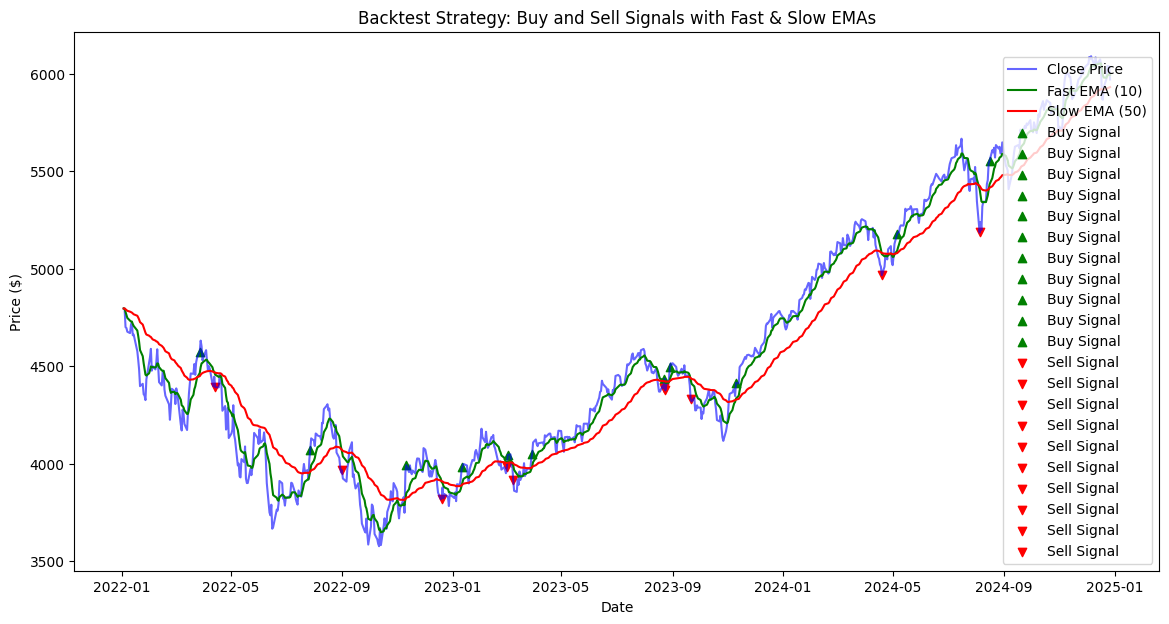

In [ ]:
# Calculate the necessary indicators
data['Fast_EMA'] = data['Close'].ewm(span=10, adjust=False).mean()
data['Slow_EMA'] = data['Close'].ewm(span=50, adjust=False).mean()
data['Stochastic_K'], data['Stochastic_D'] = talib.STOCH(data['High'], data['Low'], data['Close'], fastk_period=14)

# Initialize variables
initial_balance = 10000
balance = initial_balance
position = 0
transactions = []

# Backtest loop
for i in range(1, len(data)):
    # Check for Buy Signal (Fast EMA crosses above Slow EMA and Stochastic Oscillator crosses above 20)
    if data['Fast_EMA'][i] > data['Slow_EMA'][i] and data['Stochastic_K'][i] > 20 and position == 0:
        position = balance / data['Close'][i]  # Buy
        balance = 0  # All capital is invested
        transactions.append(('Buy', data.index[i], data['Close'][i]))

    # Check for Sell Signal (Fast EMA crosses below Slow EMA and Stochastic Oscillator crosses below 80)
    elif data['Fast_EMA'][i] < data['Slow_EMA'][i] and data['Stochastic_K'][i] < 80 and position > 0:
        balance = position * data['Close'][i]  # Sell
        position = 0  # No position left
        transactions.append(('Sell', data.index[i], data['Close'][i]))

# Calculate final balance and net profit
final_balance = balance if position == 0 else position * data['Close'].iloc[-1]
net_profit = final_balance - initial_balance

# Output results
print(f"Initial Balance: ${initial_balance}")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Net Profit: ${net_profit:.2f}")

# Plotting

plt.figure(figsize=(14, 7))

# Plot the closing price
plt.plot(data.index, data['Close'], label="Close Price", color='blue', alpha=0.6)

# Plot the Fast and Slow EMAs
plt.plot(data.index, data['Fast_EMA'], label="Fast EMA (10)", color='green')
plt.plot(data.index, data['Slow_EMA'], label="Slow EMA (50)", color='red')

# Plot Buy signals (green markers)
buy_signals = [t for t in transactions if t[0] == 'Buy']
for signal in buy_signals:
    plt.scatter(signal[1], signal[2], marker='^', color='green', label='Buy Signal', alpha=1)

# Plot Sell signals (red markers)
sell_signals = [t for t in transactions if t[0] == 'Sell']
for signal in sell_signals:
    plt.scatter(signal[1], signal[2], marker='v', color='red', label='Sell Signal', alpha=1)

# Add labels and title
plt.title("Backtest Strategy: Buy and Sell Signals with Fast & Slow EMAs")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()

plt.show()


7.91%